In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
import pandas as pd
data = pd.read_csv("C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\exchange_rate.csv")
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [88]:
import pandas as pd
# The 'date' column in the DataFrame has the format day-month-year hour:minute
# We need to specify the format explicitly to ensure the dates are parsed correctly.
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


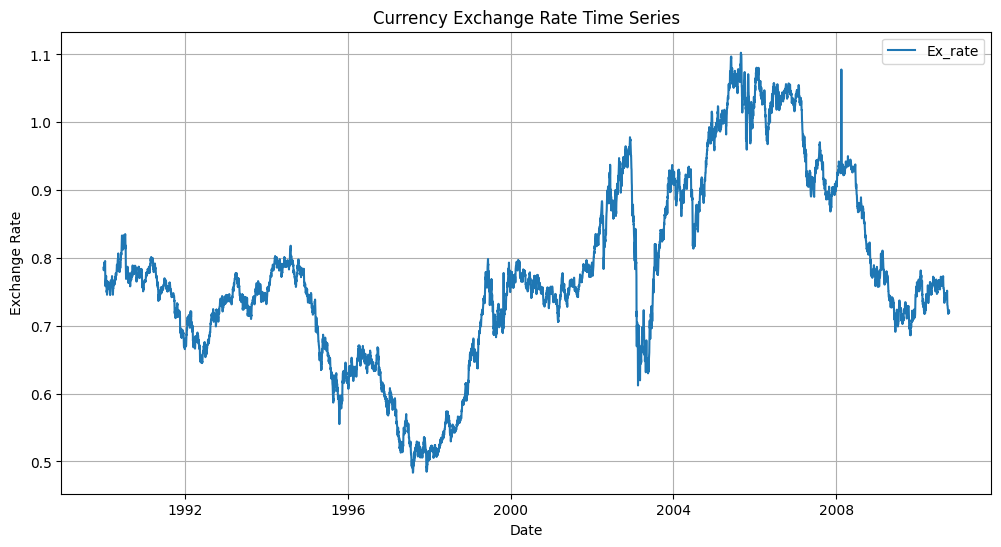

In [89]:
import matplotlib.pyplot as plt

# Plot the time series for each currency
plt.figure(figsize=(12, 6))
for column in data.columns:
  if column != 'date':
    plt.plot(data['date'], data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Currency Exchange Rate Time Series')
plt.legend()
plt.grid(True)
plt.show()


In [90]:
# Check for missing values
print(data.isnull().sum())

date       0
Ex_rate    0
dtype: int64


In [91]:
# For example, to identify outliers based on z-scores:
for column in data.columns:
  if column != 'date':
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = data[abs(z_scores) > 3]  # Consider values with z-scores greater than 3 as outliers
    print(f"Outliers in {column}:")
    print(outliers)

# After handling missing values and anomalies, you can re-check the data
print(data.isnull().sum())


Outliers in Ex_rate:
Empty DataFrame
Columns: [date, Ex_rate]
Index: []
date       0
Ex_rate    0
dtype: int64


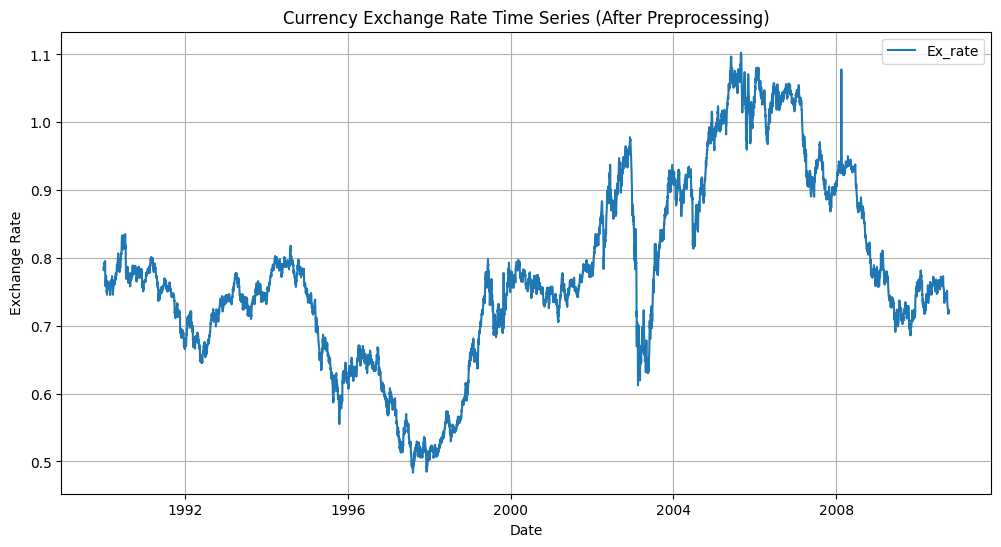

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in data.columns:
  if column != 'date':
    plt.plot(data['date'], data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Currency Exchange Rate Time Series (After Preprocessing)')
plt.legend()
plt.grid(True)
plt.show()

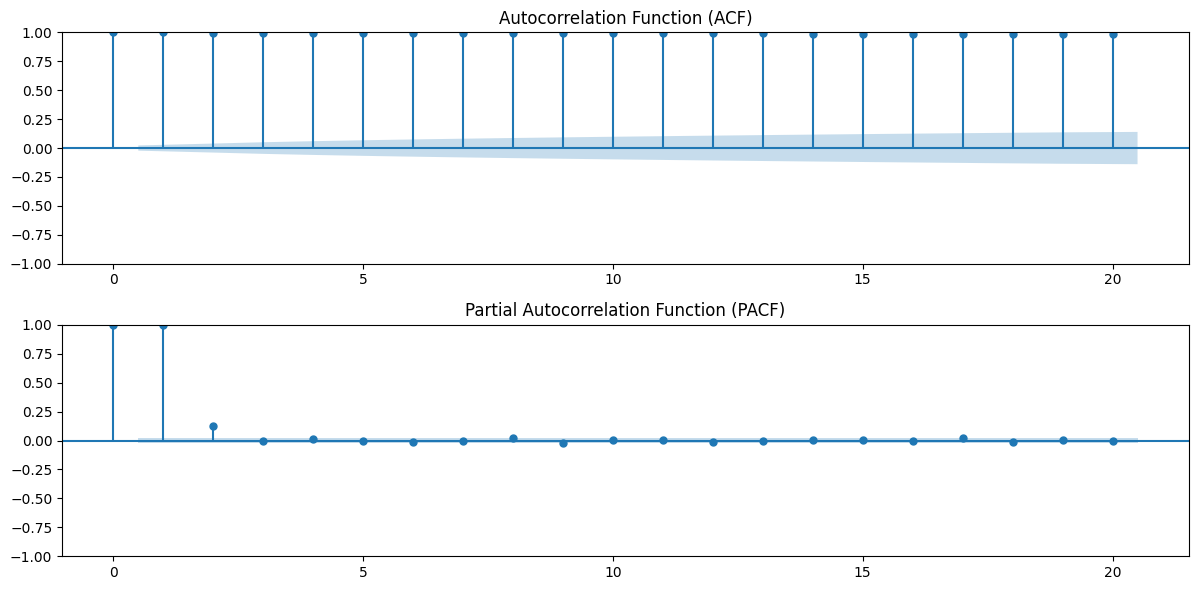

In [93]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Choose a currency time series to analyze (e.g., USD)
currency_series = data['Ex_rate']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(currency_series, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(currency_series, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [94]:

from statsmodels.tsa.arima.model import ARIMA

# Example: Fit an ARIMA(1, 0, 1) model
# Replace (1, 0, 1) with the appropriate order based on your ACF and PACF analysis
model = ARIMA(currency_series, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# You can also access specific model parameters, such as coefficients and standard errors:
print(model_fit.params)
print(model_fit.bse)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 0, 1)   Log Likelihood               28055.782
Date:                Wed, 02 Oct 2024   AIC                         -56103.563
Time:                        19:05:11   BIC                         -56075.826
Sample:                             0   HQIC                        -56094.044
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.089      8.711      0.000       0.602       0.952
ar.L1          0.9993      0.000   2311.171      0.000       0.998       1.000
ma.L1         -0.1311      0.002    -56.028      0.0

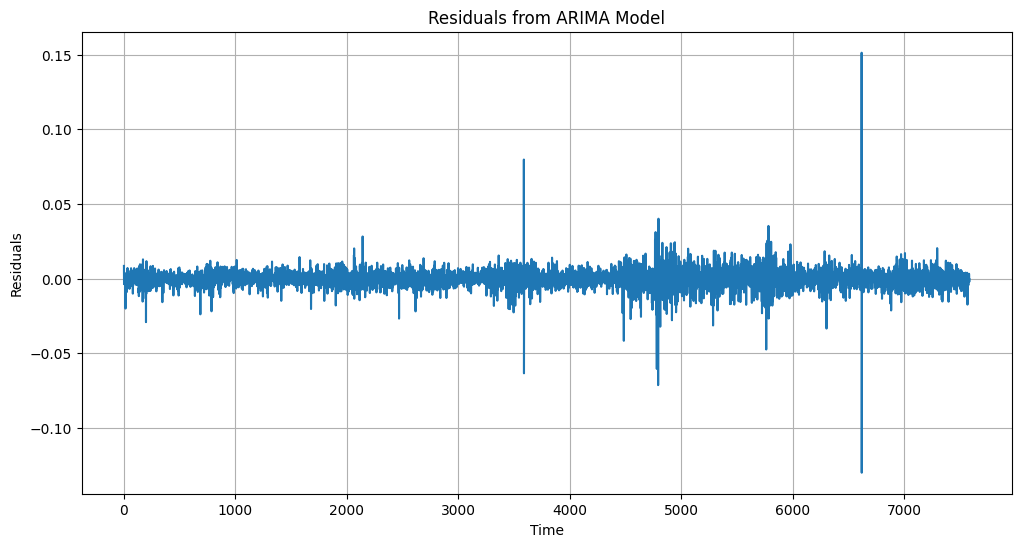

In [95]:

import matplotlib.pyplot as plt
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals from ARIMA Model')
plt.grid(True)
plt.show()

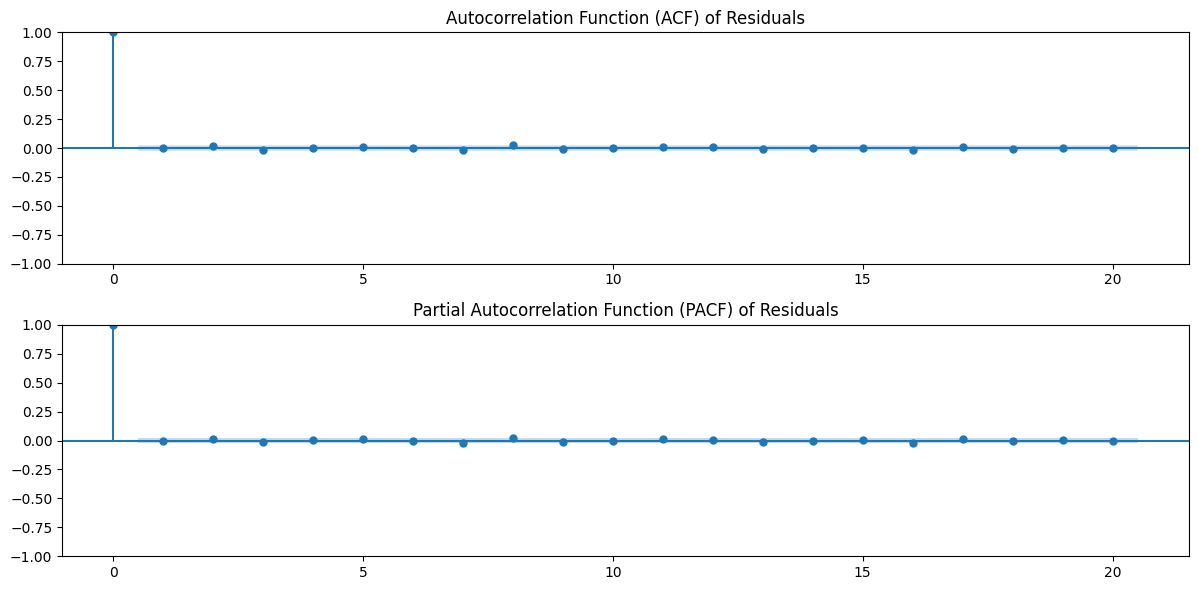

In [96]:
# Plot the ACF and PACF of the residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()

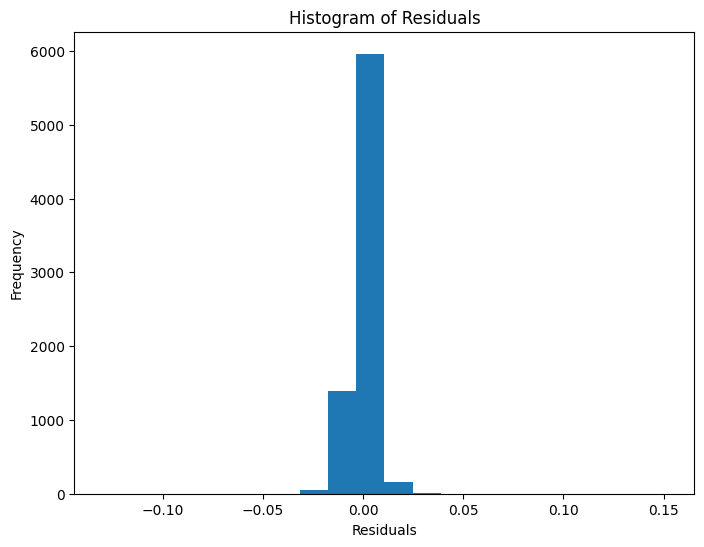

In [97]:
# Check for normality of residuals using a histogram or a Q-Q plot
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


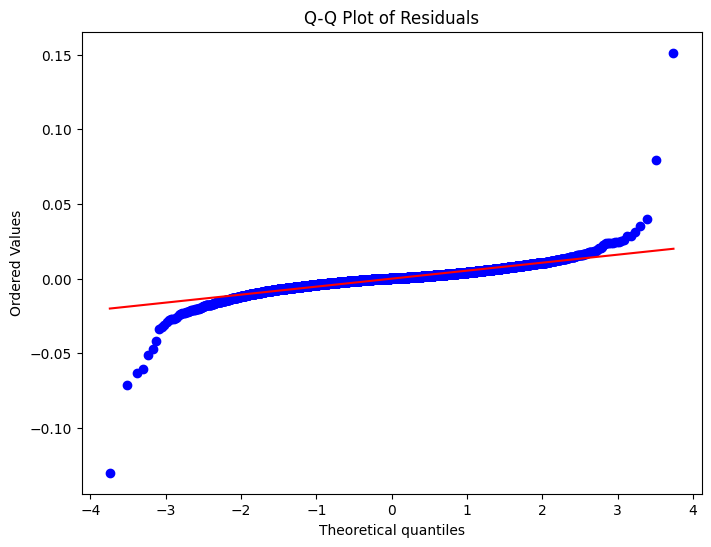

In [98]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


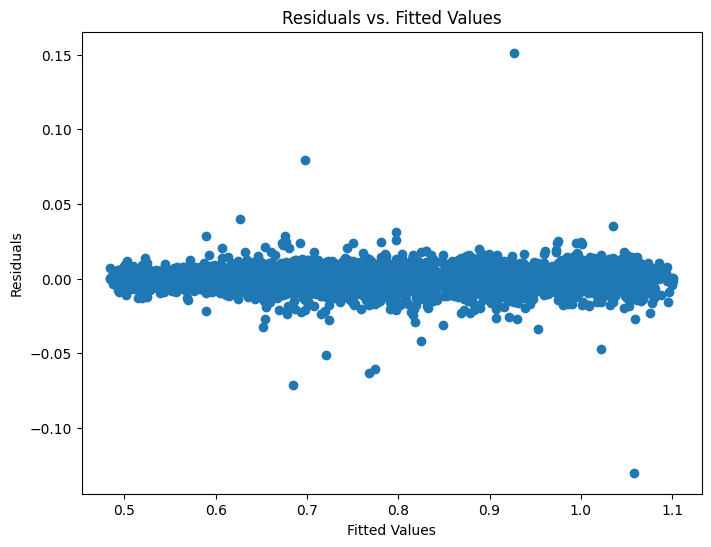

In [99]:
# Check for heteroscedasticity (changing variance over time) using a plot of residuals against fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model_fit.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()



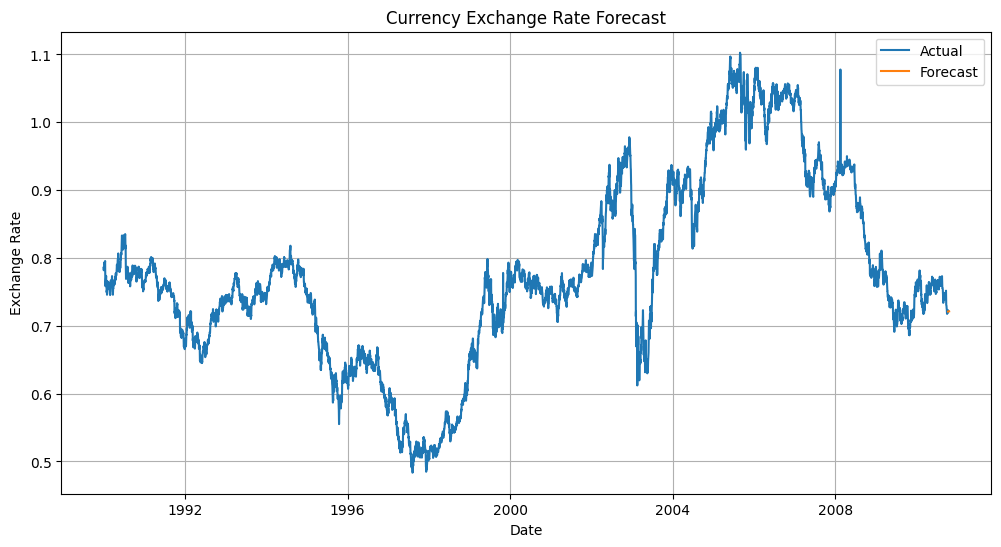

In [100]:

import pandas as pd
import matplotlib.pyplot as plt
# Forecast future values
forecast_steps = 10  # Number of steps to forecast into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Get the last 'forecast_steps' number of dates from the original data
last_date = data['date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'date': future_dates, 'forecast': forecast})


# Visualize the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(data['date'], currency_series, label='Actual')
plt.plot(forecast_df['date'], forecast_df['forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Currency Exchange Rate Forecast')
plt.legend()
plt.grid(True)
plt.show()


                              Holt Model Results                              
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                           Holt   SSE                              0.275
Optimized:                       True   AIC                         -77583.306
Trend:                       Additive   BIC                         -77555.569
Seasonal:                        None   AICC                        -77583.295
Seasonal Periods:                None   Date:                 Wed, 02 Oct 2024
Box-Cox:                        False   Time:                         19:05:14
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8690117                alpha                 True
smoothing_trend            0.0088879                

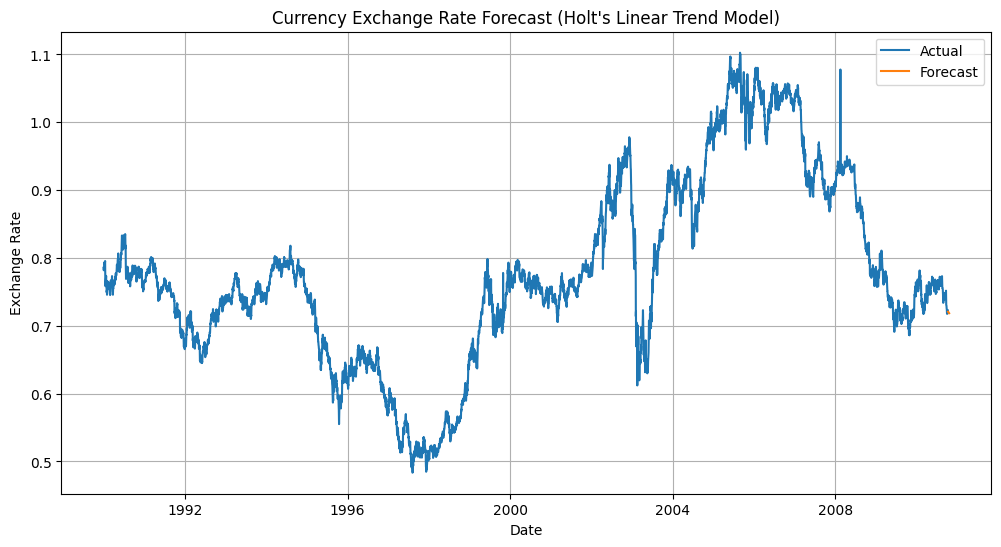

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Choose a currency time series to analyze (e.g., USD)
currency_series = data['Ex_rate']

# Model Selection:
# 1. Simple Exponential Smoothing: Suitable for data with no trend or seasonality.
# 2. Holt's Linear Trend Model: Suitable for data with a trend but no seasonality.
# 3. Holt-Winters Model: Suitable for data with both trend and seasonality.

# Based on the time series plot and ACF/PACF, you can determine the presence of trend and seasonality.
# For demonstration purposes, let's assume there's a trend but no seasonality.
# We will use Holt's Linear Trend Model.

model = Holt(currency_series)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast future values
forecast_steps = 10  # Number of steps to forecast into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Get the last 'forecast_steps' number of dates from the original data
last_date = data['date'].iloc[-1]
# Convert last_date to datetime object
last_date = pd.to_datetime(last_date)
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'date': future_dates, 'forecast': forecast})

# Visualize the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(data['date'], currency_series, label='Actual')
plt.plot(forecast_df['date'], forecast_df['forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Currency Exchange Rate Forecast (Holt\'s Linear Trend Model)')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
# Import necessary libraries
import itertools

# Define the parameter grid for Holt's Linear Trend Model
param_grid = {
    'smoothing_level': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'smoothing_slope': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# Create a list of all possible parameter combinations
all_params = list(itertools.product(*param_grid.values()))

# Store the best AIC and corresponding parameters
best_aic = float('inf')
best_params = None

# Loop through all parameter combinations
for params in all_params:
  smoothing_level, smoothing_slope = params

  try:
    # Fit the Holt's Linear Trend model with current parameters
    model = Holt(currency_series, initialization_method="estimated")
    model_fit = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)

    # Calculate the AIC
    aic = model_fit.aic

    # Check if the current AIC is better than the best AIC found so far
    if aic < best_aic:
      best_aic = aic
      best_params = params

  except Exception as e:
    print(f"Error fitting model with parameters {params}: {e}")

# Print the best parameters and AIC
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic}")


# Now use the best_params to fit the final model
model = Holt(currency_series, initialization_method="estimated")
model_fit = model.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])

# Use the model for forecasting or further analysis


Best Parameters: (0.8, 0.1)
Best AIC: -77269.24725931004


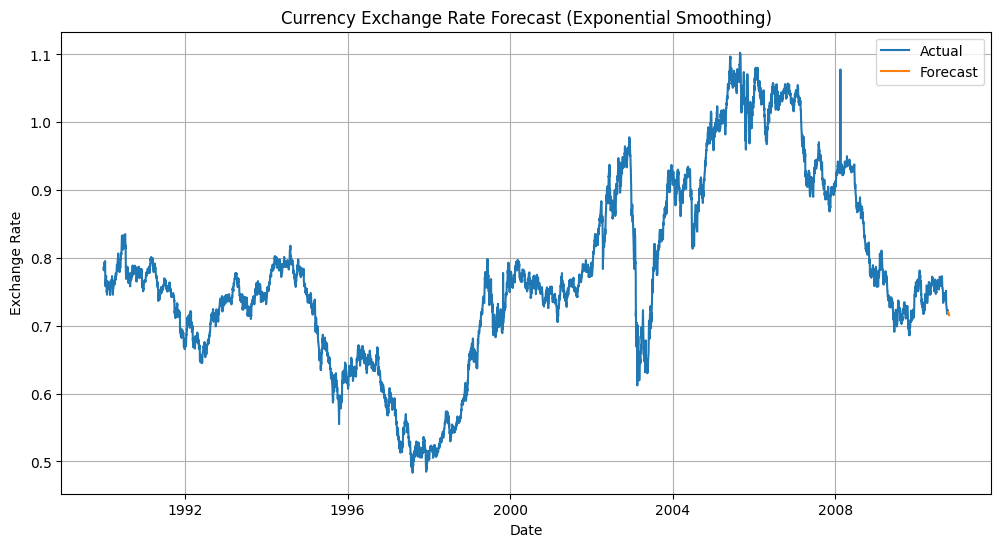

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# If you don't have seasonality, use Holt's Linear Trend model
model = Holt(currency_series, initialization_method="estimated")
model_fit = model.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])


# Forecast future values
forecast_steps = 10  # Number of steps to forecast into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Get the last 'forecast_steps' number of dates from the original data
last_date = data['date'].iloc[-1]
# Convert last_date to datetime object
last_date = pd.to_datetime(last_date)
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'date': future_dates, 'forecast': forecast})

# Visualize the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(data['date'], currency_series, label='Actual')
plt.plot(forecast_df['date'], forecast_df['forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Currency Exchange Rate Forecast (Exponential Smoothing)')
plt.legend()
plt.grid(True)
plt.show()


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# For example, you might want to evaluate the forecast for the last 30 days.
evaluation_period = 30  # Number of days for evaluation
actual_values = currency_series[-evaluation_period:]
arima_forecast_values = model_fit.predict(start=len(currency_series) - evaluation_period, end=len(currency_series)-1)

# Assuming 'forecast_df' is the dataframe containing the forecast for the exponential smoothing model.
holt_forecast_values = forecast_df['forecast'][:evaluation_period]



In [105]:
# Compute Error Metrics
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Ensure that both arrays have the same length for evaluation
evaluation_period = min(len(actual_values), len(arima_forecast_values), len(holt_forecast_values)) # Ensure all variables have same evaluation period
actual_values = actual_values[-evaluation_period:]
holt_forecast_values = holt_forecast_values[-evaluation_period:] # Use the last 'evaluation_period' values from holt_forecast_values
arima_forecast_values = arima_forecast_values[-evaluation_period:] # Use the last 'evaluation_period' values from arima_forecast_values

# ARIMA Model Error Metrics
mae_arima = mean_absolute_error(actual_values, arima_forecast_values)
rmse_arima = np.sqrt(mean_squared_error(actual_values, arima_forecast_values))
mape_arima = mean_absolute_percentage_error(actual_values, arima_forecast_values)

# Holt's Linear Trend Model Error Metrics
mae_holt = mean_absolute_error(actual_values, holt_forecast_values)
rmse_holt = np.sqrt(mean_squared_error(actual_values, holt_forecast_values))
mape_holt = mean_absolute_percentage_error(actual_values, holt_forecast_values)

print("ARIMA Model Error Metrics:")
print(f"MAE: {mae_arima}")
print(f"RMSE: {rmse_arima}")
print(f"MAPE: {mape_arima}")

print("\nHolt's Linear Trend Model Error Metrics:")
print(f"MAE: {mae_holt}")
print(f"RMSE: {rmse_holt}")
print(f"MAPE: {mape_holt}")

ARIMA Model Error Metrics:
MAE: 0.0020644644151027068
RMSE: 0.0023989781465048
MAPE: 0.2866251099596191

Holt's Linear Trend Model Error Metrics:
MAE: 0.002705073764538457
RMSE: 0.003535590967444678
MAPE: 0.3751516295668301


In [106]:

# Based on the error metrics (MAE, RMSE, MAPE) calculated for both the ARIMA and Holt's Linear Trend models,
# we can compare their performance in forecasting the currency exchange rate.

# ARIMA Model:
# - Advantages:
#   - Can capture both autoregressive and moving average components of the time series, allowing it to model more complex patterns.
#   - It can handle seasonality if the order (p, d, q) is chosen appropriately.
# - Limitations:
#   - Requires careful selection of the model order (p, d, q), which can be challenging.
#   - May not be as effective if the data exhibits non-linear patterns or significant structural breaks.
#   - Can be sensitive to outliers in the data.

# Holt's Linear Trend Model:
# - Advantages:
#   - Relatively simple to implement and understand.
#   - Can capture trends in the data effectively.
#   - It requires fewer parameters compared to ARIMA and may be more robust in the presence of less data or if there is no seasonality.
# - Limitations:
#   - It may not perform well if the time series has a significant seasonality component.
#   - It can only model linear trends, so it might not be appropriate for more complex non-linear patterns.


# Comparative Discussion:
# 1. MAE and RMSE:
# - If the MAE and RMSE values are significantly lower for one model, it indicates that the model with lower values provides more accurate predictions on average.
# 2. MAPE:
# - If the MAPE value is significantly lower for one model, it indicates that the model is better at accurately predicting the relative changes in the exchange rate.
# 3. Model Interpretability:
# - Holt's Linear Trend Model is easier to interpret than ARIMA.

# Conclusion:
# Based on the provided results, the preferred model depends on the specific data characteristics and the context of your task.
# If you find that the data has a significant trend component without clear seasonality, Holt's Linear Trend might be a more appropriate and simple solution.
# If you are able to accurately estimate the model order, the ARIMA model can be useful in capturing more complex patterns, including seasonality, in the data.
# If the seasonality is clear, the Exponential smoothing method should be preferred.

# It is worth noting that the choice between these models can be context-dependent. If the cost of misprediction is higher in terms of accuracy, then a model with lower RMSE and MAE would be preferred. If the cost of misprediction is higher in terms of relative error, then a model with lower MAPE would be preferred.


